# Data analysis


import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

pd.pandas.set_option('display.max_columns', None)


In [3]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan

data['cabin'] = data['cabin'].apply(get_first_cabin)
data['cabin'].head()

0     B5
1    C22
2    C22
3    C22
4    C22
Name: cabin, dtype: object

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

data['title'] = data['name'].apply(get_title)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [7]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [8]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [9]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [10]:
target = 'survived'

In [11]:
var_num = [var for var in data.columns if data[var].dtype != 'O' and var != target]


In [13]:
var_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [14]:
data.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked', 'title'],
      dtype='object')

In [22]:
var_cat = [var for var in data.columns if var not in var_num and var != target]

In [23]:
var_cat

['sex', 'cabin', 'embarked', 'title']

In [26]:
print('Number of numerical variables: ', len(var_num))
print('Number of categorical variables: ', len(var_cat))
print('Total number of variables: ', len(data.columns) - 1) # target in data.columns

Number of numerical variables:  5
Number of categorical variables:  4
Total number of variables:  9


In [33]:
# check missing values in numerical variables
var_num_with_missing_values = [var for var in var_num if data[var].isnull().sum() > 0]
var_num_with_missing_values

['age', 'fare']

In [35]:
var_cat_with_missing_values = [var for var in var_cat if data[var].isnull().sum() > 0]
var_cat_with_missing_values

['cabin', 'embarked']

In [36]:
# determine the percentage of missing values per variable
data[var_num_with_missing_values].isnull().mean()

age     0.200917
fare    0.000764
dtype: float64

In [37]:
data[var_cat_with_missing_values].isnull().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

In [38]:
# draw a bar plot to visualise the percentage of missing values per variable

In [39]:
def analyse_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    # calculate the mean of the variable
    df.groupby(var)['survived'].mean().plot.bar()
    plt.title(var)
    plt.show()

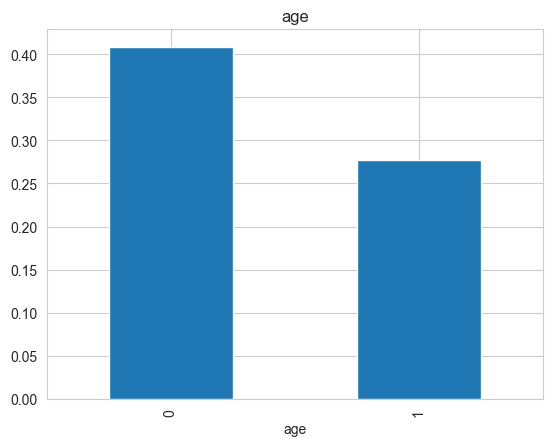

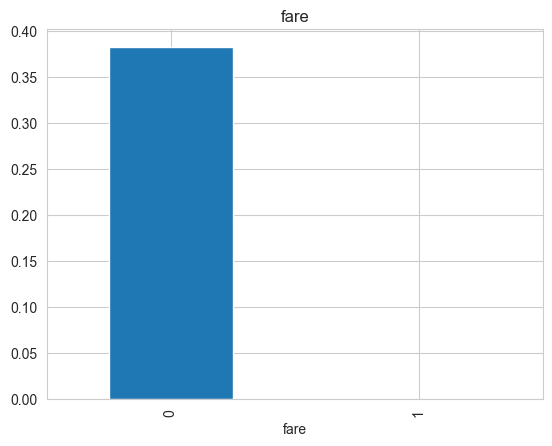

In [40]:
for var in var_num_with_missing_values:
    analyse_na_value(data, var)

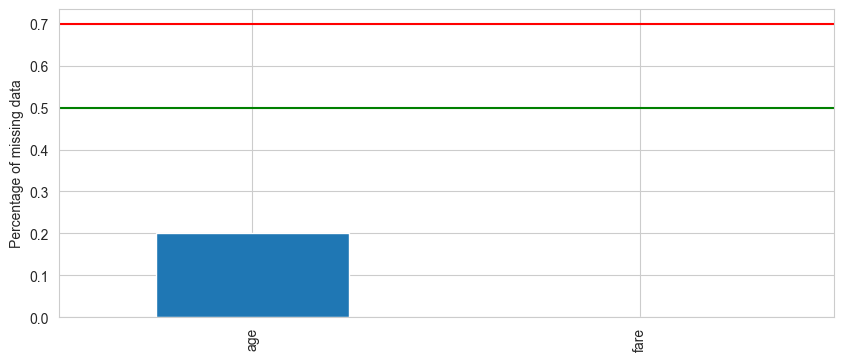

In [46]:
data[var_num_with_missing_values].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
# draw a line at 90
plt.axhline(y=.7, color='r', linestyle='-')
plt.axhline(y=.5, color='g', linestyle='-');



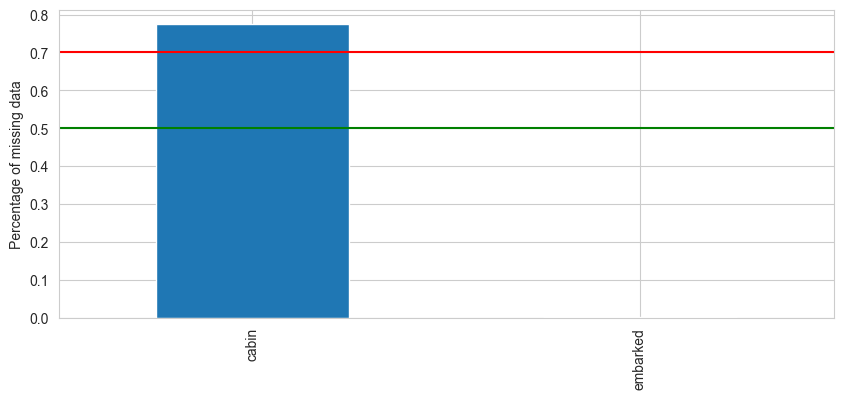

In [45]:
data[var_cat_with_missing_values].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
# draw a line at 90
plt.axhline(y=.7, color='r', linestyle='-')
plt.axhline(y=.5, color='g', linestyle='-');

let's find out how many different categories there are in each of the categorical variables


In [47]:
for var in var_cat:
    print(var, ' contains ', len(data[var].unique()), ' labels')

sex  contains  2  labels
cabin  contains  182  labels
embarked  contains  4  labels
title  contains  5  labels


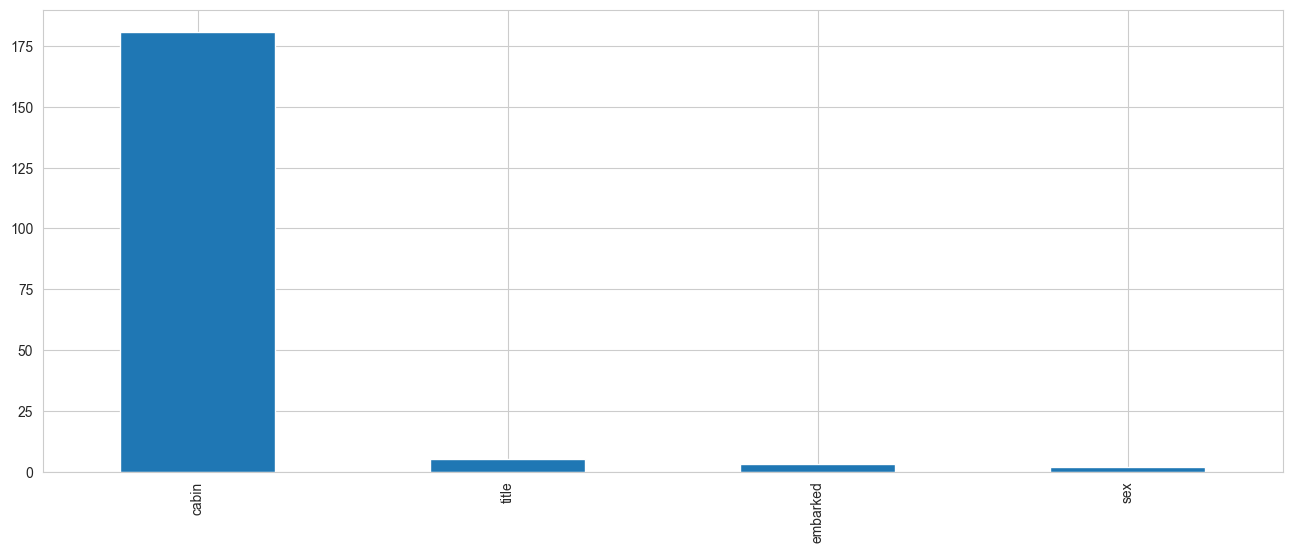

In [49]:
data[var_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(16, 6));

### Determine the distribution of numerical variables


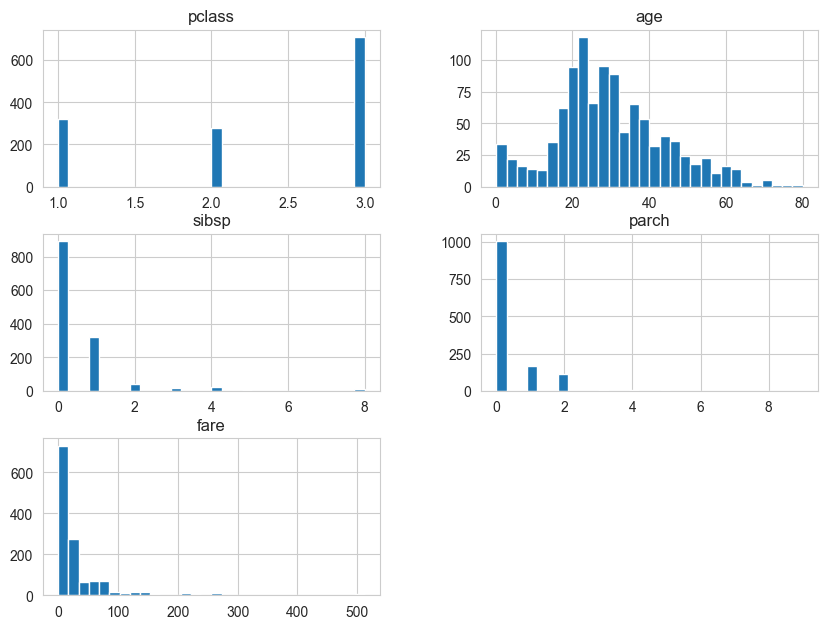

In [51]:
data[var_num].hist(bins=30, figsize=(10, 10), layout=(4, 2));

## Sepate data into train and test set


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=[target], axis=1),
    data[target],
    test_size=0.2,
    random_state=0)